Problem Statement/Requirement: Develop a model to predict which customers are likely to convert into a successful lead for a certain financial product offering.

In [1]:
#Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [3]:
#Loading the dataset

In [4]:
bn = pd.read_csv('svmfile.csv')

In [5]:
bn.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#Data pre-processing/cleaning

In [7]:
bn.shape

(41188, 21)

In [8]:
bn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
bn.job = le.fit_transform(bn.job)

In [12]:
bn.marital = le.fit_transform(bn.marital)

In [13]:
bn.education.replace({'unknown':0, 'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5, 'university.degree':6, 'professional.course':7}, inplace=True)

In [14]:
bn.default.replace({'unknown':0, 'no':1, 'yes':2}, inplace=True)

In [15]:
bn.housing.replace({'unknown':0, 'no':1, 'yes':2}, inplace=True)

In [16]:
bn.loan.replace({'unknown':0, 'no':1, 'yes':2}, inplace=True)

In [17]:
bn.contact = le.fit_transform(bn.contact)

In [18]:
bn.month.replace({'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}, inplace=True)

In [19]:
bn.day_of_week.replace({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}, inplace=True)

In [20]:
bn.poutcome.replace({'nonexistent':0, 'failure':1, 'success':2}, inplace=True)

In [21]:
bn.y.replace({'no':0, 'yes':1}, inplace=True)

In [22]:
bn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
bn.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2,1,1,1,1,5,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,5,0,1,1,1,5,1,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,5,1,2,1,1,5,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,3,1,1,1,1,5,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,5,1,1,2,1,5,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [24]:
#Sampling

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
bn_train, bn_test = train_test_split(bn, test_size=0.2)

In [27]:
bn_train_y = bn_train.iloc[:,-1]
bn_test_y = bn_test.iloc[:,-1]

In [28]:
bn_train_x = bn_train.iloc[:,:-1] 
bn_test_x = bn_test.iloc[:,:-1]

Using Decision Tree algorithm on svmfile dataset:

In [29]:
#Building the model on train & testing on test

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc = DecisionTreeClassifier()

In [32]:
#Using GridSearchCV to perform hyperparameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param = {'criterion':['entropy','gini'], 'max_depth':(5,6,7,8,9,10), 'min_samples_split':(25,40,50,70,90,120,150)}

In [35]:
grid = GridSearchCV(dtc, param_grid= param)

In [36]:
grid.fit(bn_train_x, bn_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': (5, 6, 7, 8, 9, 10),
                         'min_samples_split': (25, 40, 50, 70, 90, 120, 150)})

In [37]:
pred = grid.predict(bn_test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 40}

In [61]:
#Evaluating the model

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [40]:
cm = confusion_matrix(bn_test_y, pred)
cm

array([[7077,  275],
       [ 399,  487]], dtype=int64)

In [41]:
accuracy_score(bn_test_y, pred)*100

91.81840252488468

In [42]:
recall_score(bn_test_y, pred)*100

54.966139954853276

In [43]:
precision_score(bn_test_y, pred)*100

63.91076115485564

In [44]:
roc_auc_score(bn_test_y, pred)*100

75.61283058678464

In [45]:
pred_proba = grid.predict_proba(bn_test_x)
pred_proba

array([[0.62671233, 0.37328767],
       [1.        , 0.        ],
       [0.97237775, 0.02762225],
       ...,
       [0.97237775, 0.02762225],
       [0.7804878 , 0.2195122 ],
       [0.55963303, 0.44036697]])

In [46]:
fpr,tpr,thr = roc_curve(bn_test_y, pred_proba[:,1])

Text(0.5, 0.5, 'AUROC Score is 0.7561')

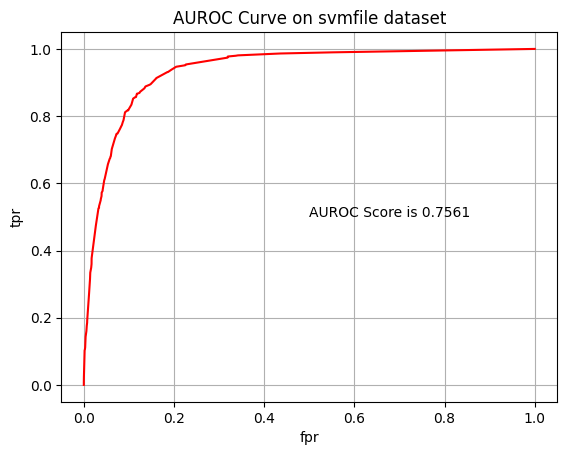

In [48]:
plt.plot(fpr,tpr,color='r')
plt.grid()
plt.title('AUROC Curve on svmfile dataset')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.text(x=0.5,y=0.5,s='AUROC Score is 0.7561')

Using SVM algorithm with GridSearchCV on svmfile dataset:

In [49]:
from sklearn.svm import SVC

In [50]:
svm = SVC()

In [51]:
param_svm = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [52]:
grid_svm = GridSearchCV(svm, param_grid = param_svm)

In [53]:
grid_svm.fit(bn_train_x, bn_train_y)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [54]:
pred = grid_svm.predict(bn_test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
cm = confusion_matrix(bn_test_y, pred)
cm

array([[7244,  108],
       [ 678,  208]], dtype=int64)

Here, we see the class imbalance issue. But, on doing oversampling, it is found that while other parameters improve, precision score is significantly hurt. As our target variable is customer, we cannot afford depreciated precision score and hence we choose not to enable oversampling. We can slightly compromise on class imbalance part while maintaining a healthy precision score and hence meet the requirement fit.

In [56]:
grid_svm.best_params_

{'kernel': 'poly'}

In [57]:
accuracy_score(bn_test_y, pred)*100

90.45884923525126

In [58]:
precision_score(bn_test_y, pred)*100

65.82278481012658

In [59]:
recall_score(bn_test_y, pred)*100

23.47629796839729

In [60]:
roc_auc_score(bn_test_y, pred)*100

61.0036549689647